In [47]:
from jlma import JLMA
from utils import make_swiss_s
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
x_swiss, x_s, categories_swiss, categories_s = make_swiss_s(n_samples = 1000)

In [50]:
# x_s = scaler.fit_transform(x_s)
# x_swiss = scaler.fit_transform(x_swiss)

In [51]:
x_s

array([[ 0.43240457,  0.0170875 ,  1.9016797 ],
       [-0.85525823,  0.20214075, -1.51820204],
       [ 0.79498436,  1.39292785,  1.60662992],
       ...,
       [-0.98857205,  1.50693128,  1.15074914],
       [ 0.74945542,  0.03032132,  1.66205481],
       [-0.9905584 ,  0.1245021 ,  0.86290858]])

In [52]:
anchor_inds = np.random.choice(range(len(x_swiss)), 100, replace=False)
anchors = [(i, i) for i in anchor_inds]

In [53]:
jlma = JLMA(d = 3, k = 30)
jlma.fit(x_swiss, x_s, anchors)

In [54]:
cats = np.concatenate((categories_swiss, categories_s))


In [55]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=jlma.Y[:, 0],
    y=jlma.Y[:, 1],
    z=jlma.Y[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cats,
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.show()

<Axes: >

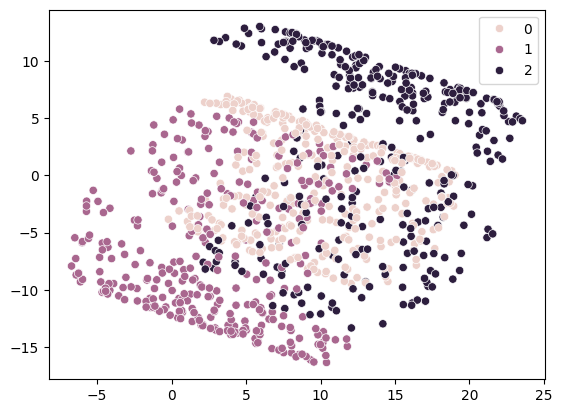

In [56]:
sns.scatterplot(x = jlma.Y1[:, 0], y = jlma.Y1[:, 1], hue = categories_swiss)

<Axes: >

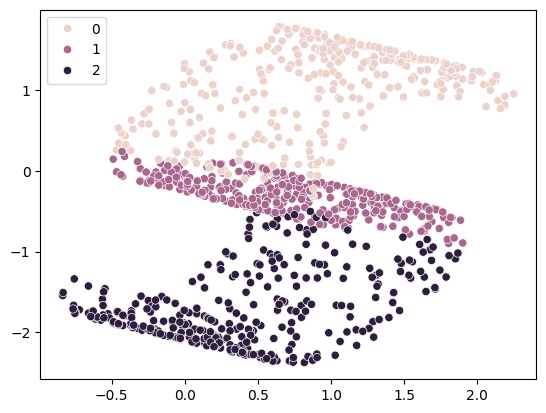

In [57]:
sns.scatterplot(x = jlma.Y2[:, 0], y = jlma.Y2[:, 1], hue = categories_s)

<Axes: >

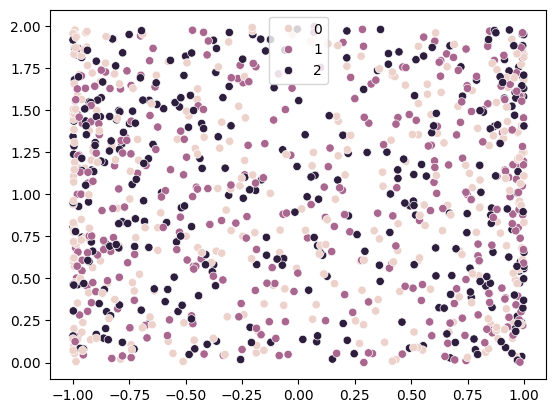

In [58]:
sns.scatterplot(x = jlma.X2[:, 0], y = jlma.X2[:, 1], hue = categories_s)

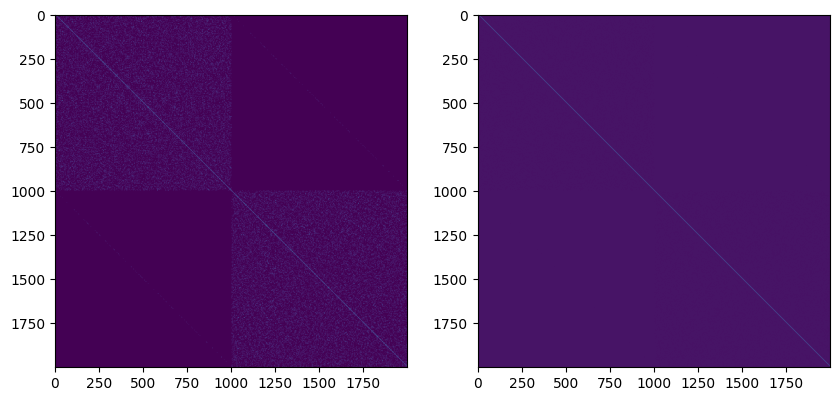

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(jlma.W)
ax[1].imshow(jlma.L)

In [60]:
import phate

phate_op = phate.PHATE(knn_dist = 'precomputed_affinity')

Y_phate = phate_op.fit_transform(jlma.W)


Calculating PHATE...
  Running PHATE on precomputed affinity matrix with 2000 observations.
  Calculating graph and diffusion operator...
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 2.12 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.70 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.87 seconds.
Calculated PHATE in 8.77 seconds.


<Axes: >

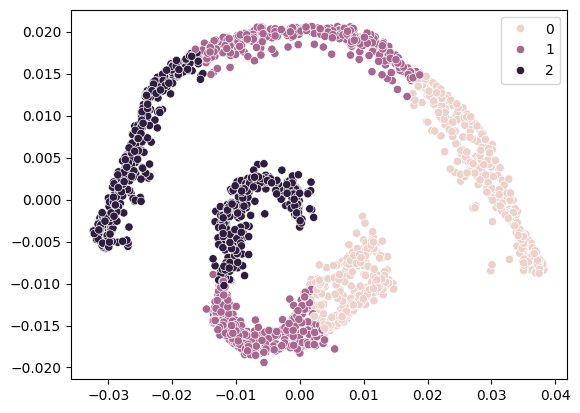

In [61]:
sns.scatterplot(x = Y_phate[:, 0], y = Y_phate[:, 1], hue = cats)